In [1]:
# 기본패키지 
import numpy as np
import pandas as pd 
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:

#한글설정/차트 마이너스 깨짐현상 해결/ seaborn 화면설정 
from matplotlib import rc
import matplotlib.font_manager as fm 
plt.rc('font',family='D2Coding')
sns.set(font='D2Coding', rc= {'axes.unicode_minus':False}, style='darkgrid' )


In [3]:

# 머신러닝 패키지 import
import statsmodels.api as sm 
import sklearn as sk

In [4]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [5]:
from sklearn.model_selection import train_test_split

# 훈련세트 테스트세트 분리

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [6]:
# 훈련 입력세트 / 테스트, 입력세트 2차원으로 변경

new_train_input = np.row_stack((train_input))
new_train_input.shape

(42, 1)

In [8]:
#테스트 입력 세트

new_test_input = np.row_stack((test_input))
new_test_input.shape

(14, 1)

In [9]:
# 모델 훈련

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

In [11]:
knr.fit(new_train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [12]:
knr.score(new_test_input, test_target)

0.9746459963987609

In [13]:
knr.score(new_train_input, train_target)

0.9804899950518966

In [14]:
#길이가 50cm? 무게는?
knr.predict([[50]])

array([1033.33333333])

##### 무게가 1500이 넘어야 하는데 
머신러닝 모델이 별론가?

##### 훈련 세트에 대한 산점도

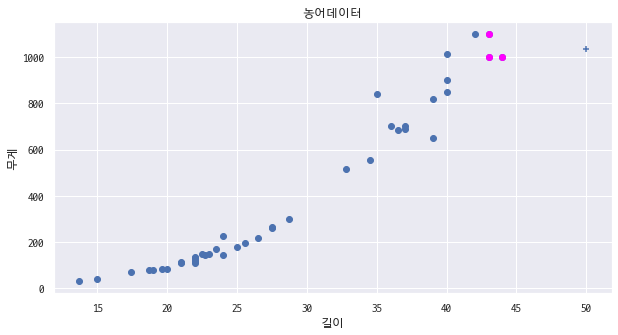

In [19]:
dist, inds = knr.kneighbors([[50]])

plt.figure(figsize=(10,5))
plt.scatter(new_train_input, train_target, color='b')
# plt.scatter(new_train_input, knr.predict(new_train_input), color='r')
plt.scatter(new_train_input[inds], train_target[inds], color='magenta')
plt.scatter(50, knr.predict([[50]])[0], marker='+')

plt.title('농어데이터')
plt.xlabel('길이')
plt.ylabel('무게')

plt.show()



##### 이웃(3개) 평균

In [20]:
train_target[inds]

array([[1000., 1000., 1100.]])

In [21]:
np.mean(train_target[inds])

1033.3333333333333

In [24]:
#길이가 100cm이어도 무게는 어떻게 나오는가? 안바뀌네;;;
knr.predict(X=[[100]])[0]

1033.3333333333333

#### 선형회귀 LinearRegression 
가장 대표적인 회귀 알고리즘

In [26]:
# KNN을 부르지 않아 > LinearRegression을 사용해야함

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [27]:
#선형회귀 모델로 훈련
lr.fit(new_train_input, train_target)

LinearRegression()

In [28]:
#결정계수확인

lr.score(new_train_input, train_target)


0.9398463339976041

In [29]:
#테스트 데이터로 결정계수 확인
lr.score(new_test_input, test_target)

0.824750312331356

In [30]:
#길이 50cm일때 무게는?

lr.predict([[50]])
# knn은 1033.333, 선형회귀는 1241.8386
# 430 vs 260

array([1241.83860323])

In [31]:
#1차 방정식의 값을 도출
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


- coef_: 선형회귀 모델의 계수 = weight(가중치) (기울기)
- intercept_: 선형회귀 모델의 절편 = bias(바이어스, 잔차, error)


##### 선형회귀 LinearRegression 산점도

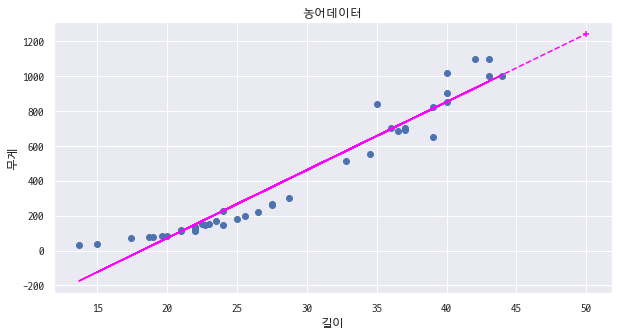

In [42]:
plt.figure(figsize=(10,5))
plt.scatter(new_train_input, train_target, color='b')
# plt.scatter(new_train_input, lr.predict(new_train_input), color='r')
plt.scatter(50, lr.predict([[50]]), marker='+', color='magenta')

plt.plot(new_train_input, lr.predict(new_train_input), color='magenta')

#1차 방정식

plt.plot([15,50], [15*lr.coef_[0]+lr.intercept_, 50*lr.coef_[0]+lr.intercept_], color='magenta', linestyle='dashed')
plt.plot
plt.title('농어데이터')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

In [43]:
19.6*19.6

384.1600000000001

In [44]:
###다항회귀

In [60]:
train_poly = np.column_stack((new_train_input**2, new_train_input))
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [61]:
test_poly = np.column_stack((new_test_input**2, new_test_input))
test_poly

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [1892.25,   43.5 ],
       [ 262.44,   16.2 ],
       [ 784.  ,   28.  ],
       [ 745.29,   27.3 ]])

In [62]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [63]:
#### 다항 선형회귀

In [64]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [65]:
#훈련데이터로 결정계수 확인하기
lr.score(train_poly, train_target)

0.9706807451768623

In [66]:
lr.score(test_poly, test_target)

0.9775935108325122

In [67]:
# 길이 50cm 무게 예측
# 길이 제곱, 길이
lr.predict([[50.0**2,50.0]])
# 농어의 무게 예측, 1573.98g

array([1573.98423528])

In [69]:
# a*길이*길이 + b*길이 + c
# a = 1.0143
# b = -21.5579
# c = 116.0502
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


In [70]:
##### 다항 회귀 산점도 그려보기

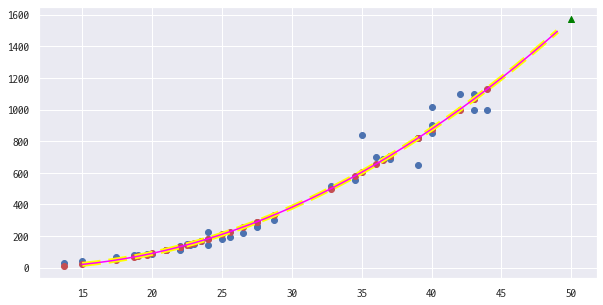

In [81]:
point = np.arange(15, 50)

plt.figure(figsize=(10,5))
plt.scatter(new_train_input, train_target, color='b')
plt.scatter(50.0, lr.predict([[50.0**2,50.0]]), marker='^', color='green')


plt.scatter(new_train_input, lr.predict(train_poly), color='r')

# 15 ~ 49 까지 2차 방정식 그리기
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_, color='yellow', linestyle='dashed', linewidth=5)

# plt.scatter(point, lr.predict(np.column_stack((point**2, point))), marker='+', color='magenta')

plt.plot(point, lr.predict(np.column_stack((point**2, point))), color='magenta')

plt.show()